# Homework w03d05 -  Bias-Variance Tradeoff

Use the function and x_data values together with some random normal noise below to generate y_data.
Perform an ordinary least squares fit of y_data versus x_data of the following form
    
1. With a monomial of the form $a + b  x^n$ for varying integer values n
1. With a polynomial of degree $n$ of the form $a_0+a_1 x+ a_2 x^2 + \ldots + x^n$ for varying integer values $n$.

For all cases, calculate the variance and the bias. What do you observe?

Optional: Vary the standard deviation $\sigma$ of the random normal noise.

Hint: For the predicted values $\hat{y}$, the bias can be calculated as ${\rm Bias} = {\rm SSE} - {\rm Var}(\hat{y}) - \sigma^2$ where $\sigma$ is the standard deviation of the random noise and ${\rm SSE} = {\rm Mean}({\rm Mean}(\hat{y}) - y)^2)$.

In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
def func(x_):
    return 1./(1+x_**2)

np.random.seed(10)
x_data = np.linspace(-20,20,201)
sigma = 1
noise = sigma*np.random.normal(size=len(x_data),scale = 1)
y_data = func(x_data)+ noise

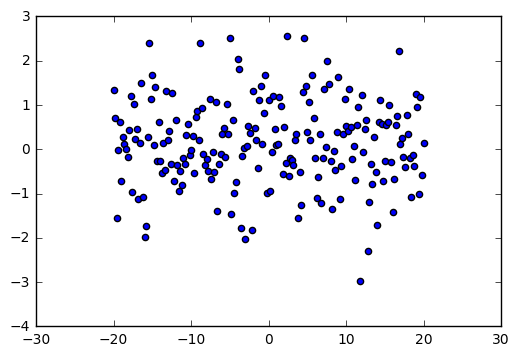

In [23]:
plt.scatter(x_data,y_data)
plt.show()

### 1. With a monomial of the form $a + b  y^n$ for varying integer values n

In [24]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

def vector_to_power_of(vector,n):
    return [a**n for a in vector]

alg = LinearRegression()
for i in range(1,11):
    X = vector_to_power_of(x_data,i)
    model = alg.fit(X, y_data)
    predictions = model.predict(X)
    sse = np.mean((np.mean(predictions) - y_data) ** 2)
    var = np.var(predictions)
    bias = sse - var - 0.01
    print("Degree %d, Variance %f, Bias %f" % (i, var, bias))

Degree 1, Variance 0.000343, Bias 0.930725
Degree 2, Variance 0.002110, Bias 0.928958
Degree 3, Variance 0.000374, Bias 0.930695
Degree 4, Variance 0.000760, Bias 0.930308
Degree 5, Variance 0.000153, Bias 0.930916
Degree 6, Variance 0.000298, Bias 0.930770
Degree 7, Variance 0.000072, Bias 0.930996
Degree 8, Variance 0.000133, Bias 0.930936
Degree 9, Variance 0.000056, Bias 0.931012
Degree 10, Variance 0.000062, Bias 0.931006


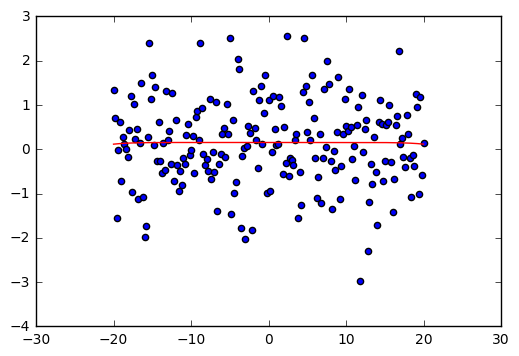

In [25]:
# Display the highest degree polynomial
plt.plot(x_data, predictions, color="red")
plt.scatter(x_data,y_data)
plt.show()

### 2.  With a polynomial of degree $n$ of the form $a_0+a_1 x+ a_2 x^2 + \ldots + x^n$ for varying integer values $n$..

In [26]:
np.random.seed(42)
x_data = np.linspace(-20,20,201)
sigma = 1
noise = sigma*np.random.normal(size=len(x_data))
y_data = func(x_data)+ noise

Degree 1, Variance 0.000000, Bias 0.862996


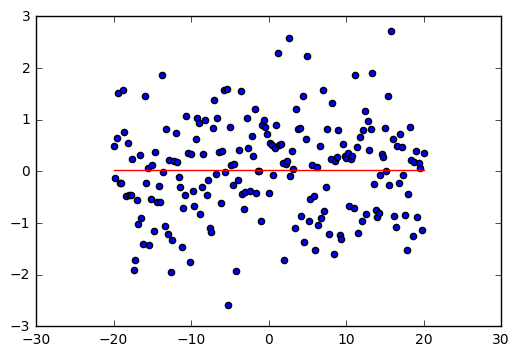

Degree 2, Variance 0.004749, Bias 0.858247
Degree 3, Variance 0.013664, Bias 0.849331
Degree 4, Variance 0.018974, Bias 0.844021
Degree 5, Variance 0.028126, Bias 0.834870
Degree 6, Variance 0.050280, Bias 0.812715
Degree 7, Variance 0.050380, Bias 0.812615
Degree 8, Variance 0.050826, Bias 0.812169
Degree 9, Variance 0.059376, Bias 0.803620
Degree 10, Variance 0.064613, Bias 0.798382
Degree 11, Variance 0.065587, Bias 0.797409
Degree 12, Variance 0.065628, Bias 0.797367
Degree 13, Variance 0.066620, Bias 0.796375
Degree 14, Variance 0.069060, Bias 0.793936


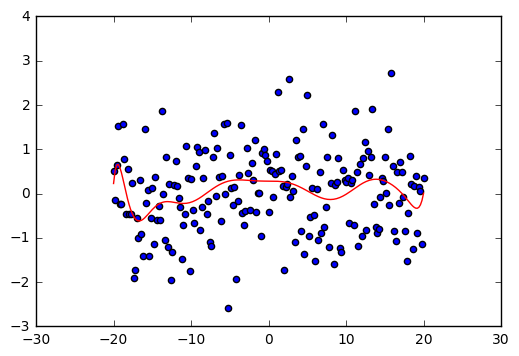

Degree 15, Variance 0.065111, Bias 0.797885
Degree 16, Variance 0.068185, Bias 0.794811
Degree 17, Variance 0.061792, Bias 0.801204
Degree 18, Variance 0.061925, Bias 0.801071
Degree 19, Variance 0.057408, Bias 0.805588
Degree 20, Variance 0.056362, Bias 0.806634
Degree 21, Variance 0.053311, Bias 0.809685
Degree 22, Variance 0.052219, Bias 0.810777
Degree 23, Variance 0.051847, Bias 0.811149
Degree 24, Variance 0.051012, Bias 0.811984
Degree 25, Variance 0.052760, Bias 0.810236


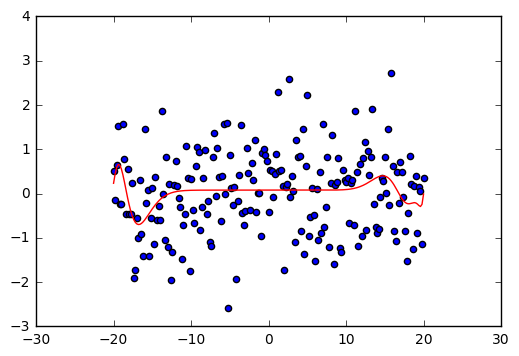

Degree 26, Variance 0.052662, Bias 0.810334
Degree 27, Variance 0.054717, Bias 0.808278
Degree 28, Variance 0.051235, Bias 0.811760
Degree 29, Variance 0.056210, Bias 0.806786
Degree 30, Variance 0.055359, Bias 0.807636
Degree 31, Variance 0.052008, Bias 0.810988
Degree 32, Variance 0.053116, Bias 0.809879
Degree 33, Variance 0.050016, Bias 0.812980
Degree 34, Variance 0.054382, Bias 0.808613
Degree 35, Variance 0.047401, Bias 0.815595
Degree 36, Variance 0.055099, Bias 0.807897
Degree 37, Variance 0.044676, Bias 0.818320
Degree 38, Variance 0.055003, Bias 0.807993
Degree 39, Variance 0.042193, Bias 0.820803
Degree 40, Variance 0.054008, Bias 0.808988
Degree 41, Variance 0.040093, Bias 0.822902
Degree 42, Variance 0.052172, Bias 0.810824
Degree 43, Variance 0.038362, Bias 0.824634
Degree 44, Variance 0.049635, Bias 0.813361
Degree 45, Variance 0.036885, Bias 0.826111
Degree 46, Variance 0.046643, Bias 0.816353
Degree 47, Variance 0.035532, Bias 0.827464
Degree 48, Variance 0.043314, Bi

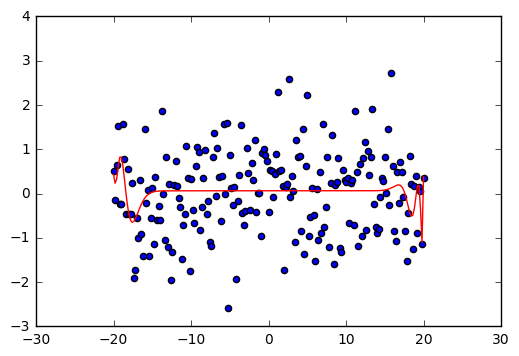

In [27]:
alg = LinearRegression()   
for i in range(1,51):
    X = np.vander(x_data,i)
    model = alg.fit(X, y_data)
    predictions = model.predict(X)
    sse = np.mean((np.mean(predictions) - y_data) ** 2)
    var = np.var(predictions)
    bias = sse - var - 0.01
    print("Degree %d, Variance %f, Bias %f" % (i, var, bias))
    if i==1 or i==14 or i ==25 or i == 50:
        plt.plot(x_data, predictions, color="red")
        plt.scatter(x_data,y_data)
        plt.show()

### Observations

With the monomial form, increasing the degree makes little difference. Since the data is randomly generated, bias is high all the time. The variance however is low

With the polynomial form, increasing the degree helps decreasing bias up to some point (degree 14) since the function is now more flexible. Variance on the other hand tends to increase (until degree 14) and then slightly decreases again.

It's as if the functions gains flexibility until a certain point, which helps improve bias and variance, and then it becomes too flexible but misuses this flexbility, so the variance and bias get worse.

I tested the same exercise with sigma = 5 (why the hell did they call is scale and not sigma in the numpy function?). The results for monomial are similar. For polynomial the lowerst bias is still for degree 14 but the lowest variance is at degree 35. Again I repeated with sigma = 10 and the lowest variance was reached with an even higher polynomial.